# Chapter 3

MAchine Learning for Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [3]:
!wget $data -O data-week-3.csv

--2025-10-15 17:08:41--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>] 954.59K  --.-KB/s    in 0.008s  

2025-10-15 17:08:41 (120 MB/s) - ‘data-week-3.csv’ saved [977501/977501]



In [4]:
df = pd.read_csv('data-week-3.csv')

In [5]:
df.head().T

0             1               2  \
customerID              7590-VHVEG    5575-GNVDE      3668-QPYBK   
gender                      Female          Male            Male   
SeniorCitizen                    0             0               0   
Partner                        Yes            No              No   
Dependents                      No            No              No   
tenure                           1            34               2   
PhoneService                    No           Yes             Yes   
MultipleLines     No phone service            No              No   
InternetService                DSL           DSL             DSL   
OnlineSecurity                  No           Yes             Yes   
OnlineBackup                   Yes            No             Yes   
DeviceProtection                No           Yes              No   
TechSupport                     No            No              No   
StreamingTV                     No            No              No   
StreamingMovies                 No            No              No   
Contract            Month-to-month      One year  Month-to-month   
PaperlessBilling               Yes            No             Yes   
PaymentMethod     Electronic check  Mailed check    Mailed check   
MonthlyCharges               29.85         56.95           53.85   
TotalCharges                 29.85        1889.5          108.15   
Churn                           No            No             Yes   

                                          3                 4  
customerID                       7795-CFOCW        9237-HQITU  
gender                                 Male            Female  
SeniorCitizen                             0                 0  
Partner                                  No                No  
Dependents                               No                No  
tenure                                   45                 2  
PhoneService                             No               Yes  
MultipleLines              No phone service                No  
InternetService                         DSL       Fiber optic  
OnlineSecurity                          Yes                No  
OnlineBackup                             No                No  
DeviceProtection                        Yes                No  
TechSupport                             Yes                No  
StreamingTV                              No                No  
StreamingMovies                          No                No  
Contract                           One year    Month-to-month  
PaperlessBilling                         No               Yes  
PaymentMethod     Bank transfer (automatic)  Electronic check  
MonthlyCharges                         42.3              70.7  
TotalCharges                        1840.75            151.65  
Churn                                    No               Yes

In [6]:
#Standardize columns

df.columns = df.columns.str.lower().str.replace(' ','_')

In [7]:
categorical_columns =list(df.dtypes[df.dtypes == 'object'].index)

In [8]:
categorical_columns

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges',
 'churn']

In [9]:
#Standardize the columns data in the df

df['partner']

0       Yes
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041    Yes
7042     No
Name: partner, Length: 7043, dtype: object

In [10]:
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ','_')

In [11]:
#Verfiy standardization is applied acrosss columns and data
df.head().T

0             1               2  \
customerid              7590-vhveg    5575-gnvde      3668-qpybk   
gender                      female          male            male   
seniorcitizen                    0             0               0   
partner                        yes            no              no   
dependents                      no            no              no   
tenure                           1            34               2   
phoneservice                    no           yes             yes   
multiplelines     no_phone_service            no              no   
internetservice                dsl           dsl             dsl   
onlinesecurity                  no           yes             yes   
onlinebackup                   yes            no             yes   
deviceprotection                no           yes              no   
techsupport                     no            no              no   
streamingtv                     no            no              no   
streamingmovies                 no            no              no   
contract            month-to-month      one_year  month-to-month   
paperlessbilling               yes            no             yes   
paymentmethod     electronic_check  mailed_check    mailed_check   
monthlycharges               29.85         56.95           53.85   
totalcharges                 29.85        1889.5          108.15   
churn                           no            no             yes   

                                          3                 4  
customerid                       7795-cfocw        9237-hqitu  
gender                                 male            female  
seniorcitizen                             0                 0  
partner                                  no                no  
dependents                               no                no  
tenure                                   45                 2  
phoneservice                             no               yes  
multiplelines              no_phone_service                no  
internetservice                         dsl       fiber_optic  
onlinesecurity                          yes                no  
onlinebackup                             no                no  
deviceprotection                        yes                no  
techsupport                             yes                no  
streamingtv                              no                no  
streamingmovies                          no                no  
contract                           one_year    month-to-month  
paperlessbilling                         no               yes  
paymentmethod     bank_transfer_(automatic)  electronic_check  
monthlycharges                         42.3              70.7  
totalcharges                        1840.75            151.65  
churn                                    no               yes

In [12]:
# Some columns e.g total chanrges should be numerical but its shown as object
# This might be due to missing values let explore

df.totalcharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

In [13]:
#pd.to_numeric(df.totalcharges)

In [14]:
#The above commands throw errors which means the columns not only contain numbers but strings too

In [15]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [16]:
tc.isnull().sum()

np.int64(11)

In [17]:
df[tc.isnull()][['customerid', 'totalcharges']]

customerid totalcharges
488   4472-lvygi            _
753   3115-czmzd            _
936   5709-lvoeq            _
1082  4367-nuyao            _
1340  1371-dwpaz            _
3331  7644-omvmy            _
3826  3213-vvolg            _
4380  2520-sgtta            _
5218  2923-arzlg            _
6670  4075-wkniu            _
6754  2775-sefee            _

In [18]:
# Replacing missing values denoted by "_" with 0s

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [19]:
df.totalcharges = df.totalcharges.fillna(0)

In [20]:
# Change the churn values from boolean to numeric for ML

df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [21]:
(df.churn == 'yes').head()

0    False
1    False
2     True
3    False
4     True
Name: churn, dtype: bool

In [22]:
df.churn = (df.churn == 'yes').astype(int)

In [23]:
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

# 3.3 Setting up Validation Framework

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [26]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [27]:
len(df_full_train), len(df_test)

(5634, 1409)

In [28]:
# Now divide the df_full_train set into train and validation sets

df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [29]:
len(df_train) , len(df_val)

(4225, 1409)

In [30]:
# Resetting Indexes

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [31]:
# write chrun to y variables

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [32]:
# Drop Churn column from df_xx

del df_train['churn']
del df_val['churn']
del df_test['churn']


# EDA ( Exploratory Data Analysis)
* Check missing values
* Look at the target variable (churn)
* Loot at numerical and categorical variables

In [33]:
df_full_train = df_full_train.reset_index(drop=True)

In [34]:
df_full_train.head().T

0                        1  \
customerid                 5442-pptjy               6261-rcvns   
gender                           male                   female   
seniorcitizen                       0                        0   
partner                           yes                       no   
dependents                        yes                       no   
tenure                             12                       42   
phoneservice                      yes                      yes   
multiplelines                      no                       no   
internetservice                    no                      dsl   
onlinesecurity    no_internet_service                      yes   
onlinebackup      no_internet_service                      yes   
deviceprotection  no_internet_service                      yes   
techsupport       no_internet_service                      yes   
streamingtv       no_internet_service                       no   
streamingmovies   no_internet_service                      yes   
contract                     two_year                 one_year   
paperlessbilling                   no                       no   
paymentmethod            mailed_check  credit_card_(automatic)   
monthlycharges                   19.7                     73.9   
totalcharges                   258.35                  3160.55   
churn                               0                        1   

                                          2                 3  \
customerid                       2176-osjuv        6161-erdgd   
gender                                 male              male   
seniorcitizen                             0                 0   
partner                                 yes               yes   
dependents                               no               yes   
tenure                                   71                71   
phoneservice                            yes               yes   
multiplelines                           yes               yes   
internetservice                         dsl               dsl   
onlinesecurity                          yes               yes   
onlinebackup                            yes                no   
deviceprotection                         no               yes   
techsupport                             yes               yes   
streamingtv                              no               yes   
streamingmovies                          no               yes   
contract                           two_year          one_year   
paperlessbilling                         no                no   
paymentmethod     bank_transfer_(automatic)  electronic_check   
monthlycharges                        65.15             85.45   
totalcharges                        4681.75           6300.85   
churn                                     0                 0   

                                 4  
customerid              2364-ufrom  
gender                        male  
seniorcitizen                    0  
partner                         no  
dependents                      no  
tenure                          30  
phoneservice                   yes  
multiplelines                   no  
internetservice                dsl  
onlinesecurity                 yes  
onlinebackup                   yes  
deviceprotection                no  
techsupport                    yes  
streamingtv                    yes  
streamingmovies                 no  
contract                  one_year  
paperlessbilling                no  
paymentmethod     electronic_check  
monthlycharges                70.4  
totalcharges               2044.75  
churn                            0

1. Check for missing values

In [35]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

Seems like there are no missing values as it was fixed above already

2. Looking at the target variable now i-e churn

In [36]:
df_full_train.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [37]:
# 1 means user churn

In [38]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [39]:
#0.269968 is also called "Churn Rate"

In [40]:
#Instead of value counts , we can find the mean to calculate chrun rate too
df_full_train.churn.mean()

np.float64(0.26996805111821087)

Chrun rate formula
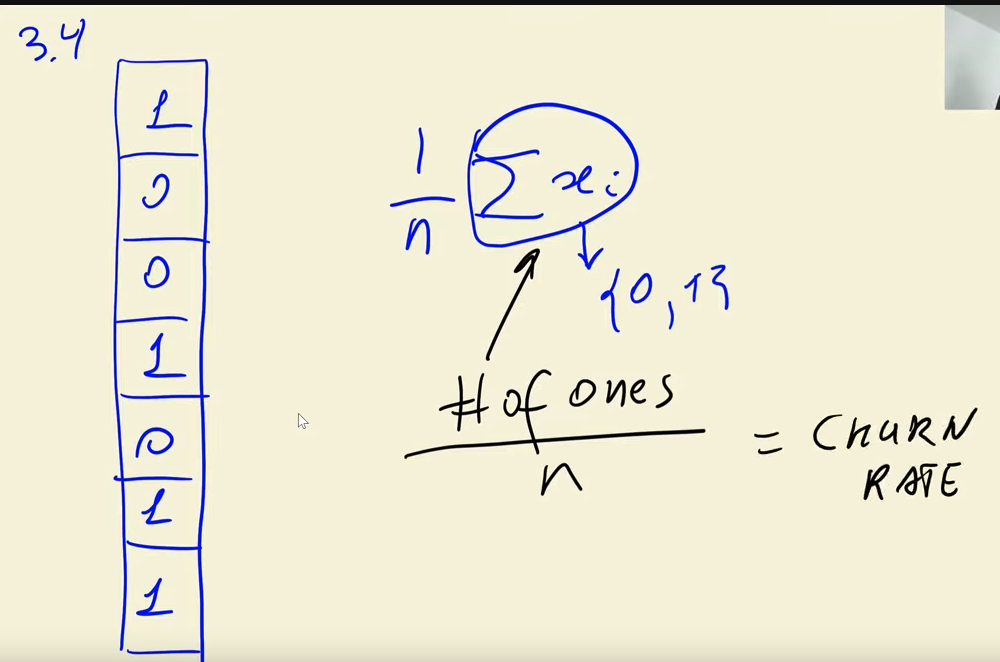

In [41]:
global_churn_rate = df_full_train.churn.mean()

In [42]:
round(global_churn_rate, 2)

np.float64(0.27)

In [43]:
global_churn_rate

np.float64(0.26996805111821087)

3. Looks and Numerical and categorical variables

In [44]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [45]:
# Out of above data types - tenure, monthlycharges and totalcharges and numerical variables
# seniorcitizen shows as int64 but its actually a categorical variable

In [46]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [47]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [48]:
categorcial = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [49]:
#Find number of unique values for categorical variables
df_full_train[categorcial].nunique()

gender               2
seniorcitizen        2
partner              2
dependents           2
tenure              73
phoneservice         2
multiplelines        3
internetservice      3
onlinesecurity       3
onlinebackup         3
deviceprotection     3
techsupport          3
streamingtv          3
streamingmovies      3
contract             3
paperlessbilling     2
paymentmethod        4
dtype: int64

# 3.5 Feature importance: Churn rate and risk ratio
Feaute importance analysis( part of EDA) - identifying which feature affect our target varialbe
* churn rate
* risk ratio
* mutial information - later

## Churn rate

In [50]:
df_full_train.head().T

0                        1  \
customerid                 5442-pptjy               6261-rcvns   
gender                           male                   female   
seniorcitizen                       0                        0   
partner                           yes                       no   
dependents                        yes                       no   
tenure                             12                       42   
phoneservice                      yes                      yes   
multiplelines                      no                       no   
internetservice                    no                      dsl   
onlinesecurity    no_internet_service                      yes   
onlinebackup      no_internet_service                      yes   
deviceprotection  no_internet_service                      yes   
techsupport       no_internet_service                      yes   
streamingtv       no_internet_service                       no   
streamingmovies   no_internet_service                      yes   
contract                     two_year                 one_year   
paperlessbilling                   no                       no   
paymentmethod            mailed_check  credit_card_(automatic)   
monthlycharges                   19.7                     73.9   
totalcharges                   258.35                  3160.55   
churn                               0                        1   

                                          2                 3  \
customerid                       2176-osjuv        6161-erdgd   
gender                                 male              male   
seniorcitizen                             0                 0   
partner                                 yes               yes   
dependents                               no               yes   
tenure                                   71                71   
phoneservice                            yes               yes   
multiplelines                           yes               yes   
internetservice                         dsl               dsl   
onlinesecurity                          yes               yes   
onlinebackup                            yes                no   
deviceprotection                         no               yes   
techsupport                             yes               yes   
streamingtv                              no               yes   
streamingmovies                          no               yes   
contract                           two_year          one_year   
paperlessbilling                         no                no   
paymentmethod     bank_transfer_(automatic)  electronic_check   
monthlycharges                        65.15             85.45   
totalcharges                        4681.75           6300.85   
churn                                     0                 0   

                                 4  
customerid              2364-ufrom  
gender                        male  
seniorcitizen                    0  
partner                         no  
dependents                      no  
tenure                          30  
phoneservice                   yes  
multiplelines                   no  
internetservice                dsl  
onlinesecurity                 yes  
onlinebackup                   yes  
deviceprotection                no  
techsupport                    yes  
streamingtv                    yes  
streamingmovies                 no  
contract                  one_year  
paperlessbilling                no  
paymentmethod     electronic_check  
monthlycharges                70.4  
totalcharges               2044.75  
churn                            0

For feature importance, we will take a look at how different variables and their categories/groups affect the churn rate

In [51]:
df_full_train[df_full_train.gender == 'female'].churn

1       1
5       1
9       1
11      0
13      1
       ..
5618    1
5619    0
5626    0
5627    0
5633    0
Name: churn, Length: 2796, dtype: int64

In [52]:
df_full_train[df_full_train.gender == 'female'].churn.mean()

np.float64(0.27682403433476394)

In [53]:
df_full_train[df_full_train.gender == 'male'].churn.mean()

np.float64(0.2632135306553911)

In [54]:
global_churn_rate

np.float64(0.26996805111821087)

Churn rate for different genders is very close to global chrun rate

Now we will look at a different varaible

In [55]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [56]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

np.float64(0.20503330866025166)

In [57]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

np.float64(0.3298090040927694)

In [58]:
global_churn_rate - churn_no_partner

np.float64(-0.05984095297455855)

In [59]:
global_churn_rate - churn_partner

np.float64(0.06493474245795922)

If group churn rate is higher than global churn rate, it means that this group is most likely to churn 
![DataTalksClub ⬛ - ML Zoomcamp 3.5 - Feature Importance Churn Rate And Risk Ratio [fzdzPLlvs40 - 1197x720 - 6m29s].png](attachment:d63bc8e7-e943-4c85-a7ed-b736b625c4f0.png)
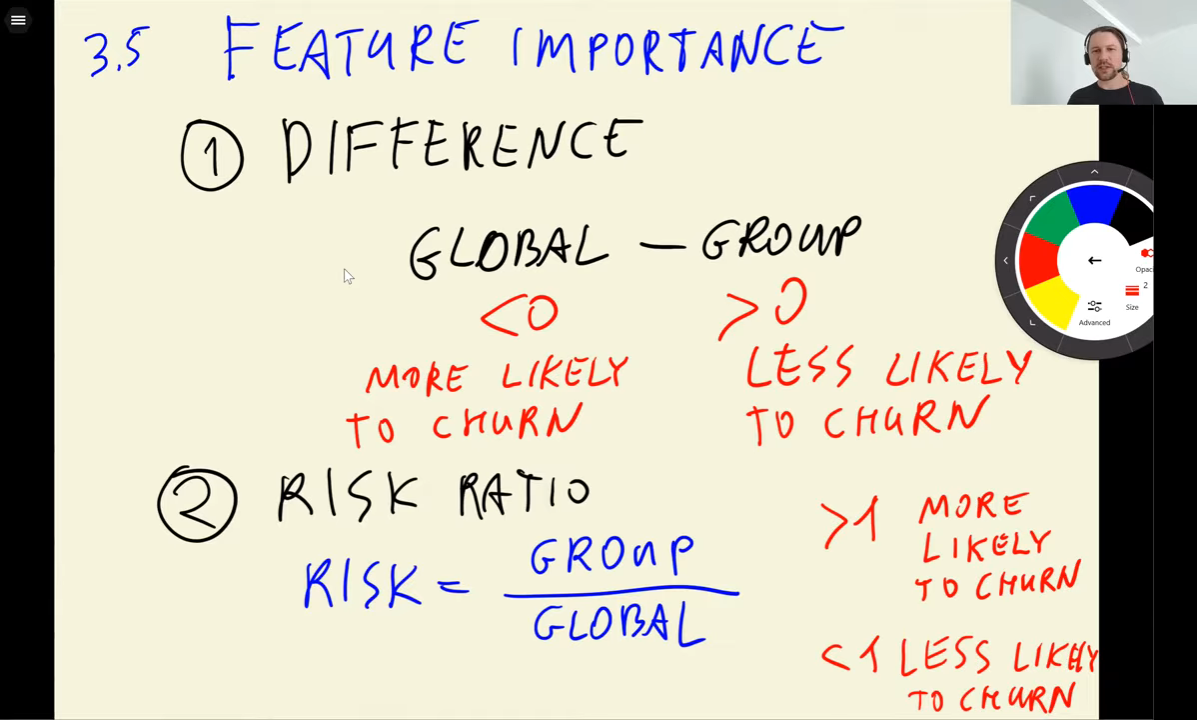

In [60]:
churn_partner/global_churn_rate

np.float64(0.7594724924338315)

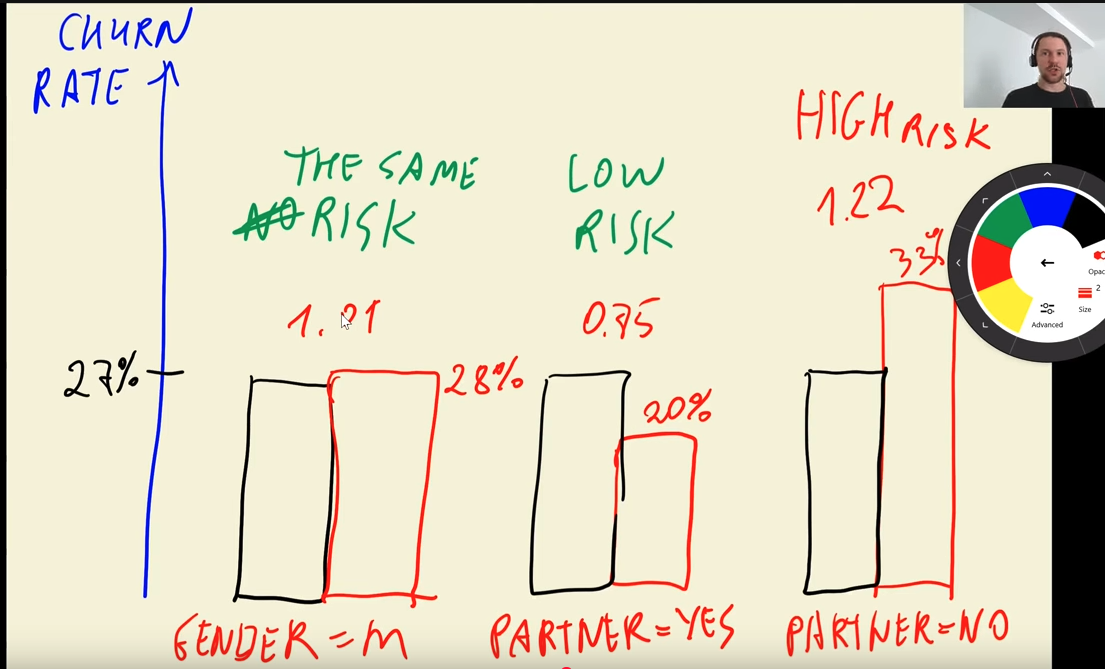

To Calculate the churn rate  via sql

Select gender, AVG(churn), AVG(churn) - global_churn AS diff,AVG(churn) / global_churn AS diff
from data group by gender;

In [61]:
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])

In [62]:
df_group

mean  count
gender                 
female  0.276824   2796
male    0.263214   2838

In [63]:
df_group['diff'] = df_group['mean'] - global_churn_rate
df_group['risk'] = df_group['mean'] / global_churn_rate
df_group

mean  count      diff      risk
gender                                     
female  0.276824   2796  0.006856  1.025396
male    0.263214   2838 -0.006755  0.974980

In [64]:
from IPython.display import display

In [65]:
for c in categorcial:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()
    print()

gender


mean  count      diff      risk
gender                                     
female  0.276824   2796  0.006856  1.025396
male    0.263214   2838 -0.006755  0.974980



seniorcitizen


mean  count      diff      risk
seniorcitizen                                     
0              0.242270   4722 -0.027698  0.897403
1              0.413377    912  0.143409  1.531208



partner


mean  count      diff      risk
partner                                     
no       0.329809   2932  0.059841  1.221659
yes      0.205033   2702 -0.064935  0.759472



dependents


mean  count      diff      risk
dependents                                     
no          0.313760   3968  0.043792  1.162212
yes         0.165666   1666 -0.104302  0.613651



tenure


mean  count      diff      risk
tenure                                     
0       0.000000      8 -0.269968  0.000000
1       0.635052    485  0.365083  2.352321
2       0.520619    194  0.250651  1.928445
3       0.448485    165  0.178517  1.661252
4       0.493151    146  0.223183  1.826700
...          ...    ...       ...       ...
68      0.102564     78 -0.167404  0.379912
69      0.092105     76 -0.177863  0.341171
70      0.125000     88 -0.144968  0.463018
71      0.027211    147 -0.242757  0.100793
72      0.014134    283 -0.255834  0.052355

[73 rows x 4 columns]



phoneservice


mean  count      diff      risk
phoneservice                                     
no            0.241316    547 -0.028652  0.893870
yes           0.273049   5087  0.003081  1.011412



multiplelines


mean  count      diff      risk
multiplelines                                        
no                0.257407   2700 -0.012561  0.953474
no_phone_service  0.241316    547 -0.028652  0.893870
yes               0.290742   2387  0.020773  1.076948



internetservice


mean  count      diff      risk
internetservice                                     
dsl              0.192347   1934 -0.077621  0.712482
fiber_optic      0.425171   2479  0.155203  1.574895
no               0.077805   1221 -0.192163  0.288201



onlinesecurity


mean  count      diff      risk
onlinesecurity                                          
no                   0.420921   2801  0.150953  1.559152
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.153226   1612 -0.116742  0.567570



onlinebackup


mean  count      diff      risk
onlinebackup                                            
no                   0.404323   2498  0.134355  1.497672
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.217232   1915 -0.052736  0.804660



deviceprotection


mean  count      diff      risk
deviceprotection                                        
no                   0.395875   2473  0.125907  1.466379
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.230412   1940 -0.039556  0.853480



techsupport


mean  count      diff      risk
techsupport                                             
no                   0.418914   2781  0.148946  1.551717
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.159926   1632 -0.110042  0.592390



streamingtv


mean  count      diff      risk
streamingtv                                             
no                   0.342832   2246  0.072864  1.269897
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.302723   2167  0.032755  1.121328



streamingmovies


mean  count      diff      risk
streamingmovies                                         
no                   0.338906   2213  0.068938  1.255358
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.307273   2200  0.037305  1.138182



contract


mean  count      diff      risk
contract                                           
month-to-month  0.431701   3104  0.161733  1.599082
one_year        0.120573   1186 -0.149395  0.446621
two_year        0.028274   1344 -0.241694  0.104730



paperlessbilling


mean  count      diff      risk
paperlessbilling                                     
no                0.172071   2313 -0.097897  0.637375
yes               0.338151   3321  0.068183  1.252560



paymentmethod


mean  count      diff      risk
paymentmethod                                                 
bank_transfer_(automatic)  0.168171   1219 -0.101797  0.622928
credit_card_(automatic)    0.164339   1217 -0.105630  0.608733
electronic_check           0.455890   1893  0.185922  1.688682
mailed_check               0.193870   1305 -0.076098  0.718121

# 3.6 Feature importance: Mutual Information

How much we can learn about one variable if we know the value of another

In [66]:
from sklearn.metrics import mutual_info_score

In [67]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [68]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [69]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

0.009967689095399745

In [70]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

0.009967689095399745

In [71]:
#Finding mutual score for all the groups

def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [72]:
mi = df_full_train[categorcial].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
tenure              0.081713
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

Following variables seems to highly important in affecting chrun

* contract            0.098320
* tenure              0.081713
* onlinesecurity      0.063085
* techsupport         0.061032
* internetservice     0.055868
* onlinebackup        0.046923
* deviceprotection    0.043453

# 3.7 Feature importance: Correlation

How about numerical columns?
* Correlation coefficient

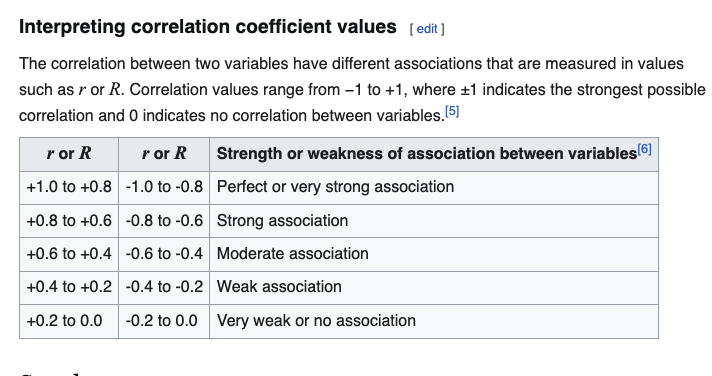
![DataTalksClub ⬛ - ML Zoomcamp 3.7 - Feature Importance Correlation [mz1707QVxiY - 1197x720 - 5m15s].jpg](attachment:7f2a228c-e209-482e-b2a2-6d0ec0e43954.jpg)
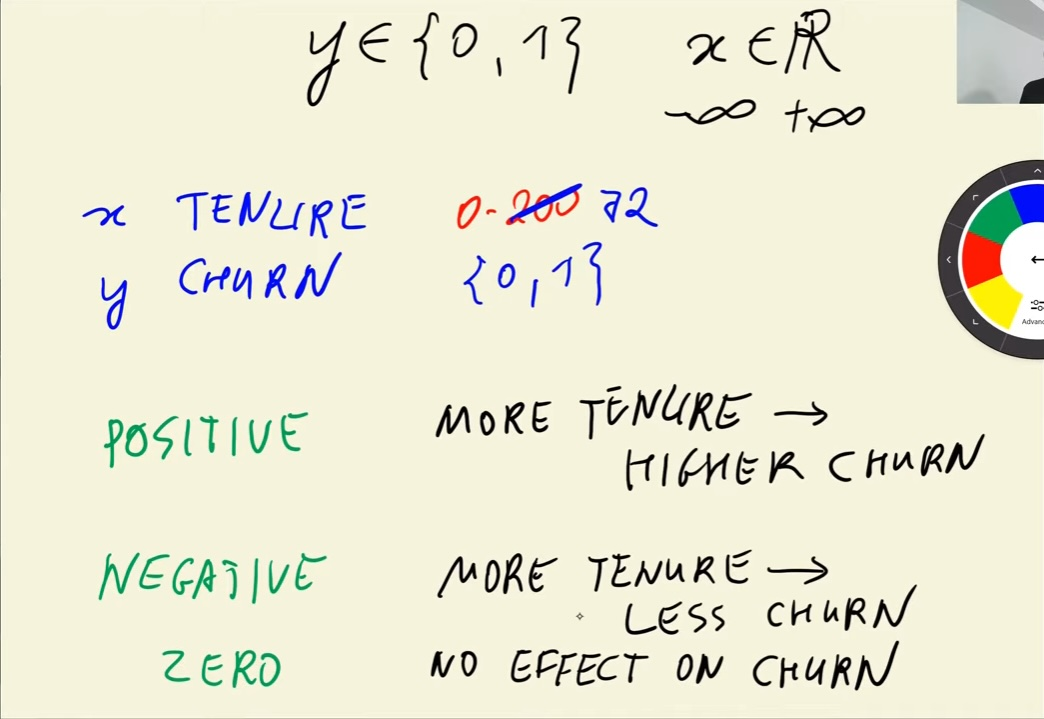

In [73]:
df_full_train.tenure.max()

np.int64(72)

In [74]:
df_full_train[numerical]

tenure  monthlycharges  totalcharges
0         12           19.70        258.35
1         42           73.90       3160.55
2         71           65.15       4681.75
3         71           85.45       6300.85
4         30           70.40       2044.75
...      ...             ...           ...
5629       9          100.50        918.60
5630      60           19.95       1189.90
5631      28          105.70       2979.50
5632       2           54.40        114.10
5633      16           68.25       1114.85

[5634 rows x 3 columns]

In [75]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [76]:
# tenure and total charges have -ve cofficient which means higher their values get the lower the churn rate will be
# monthlycharges have +ve coff which means that higher the monthly charges get , higher the churn rate will become

In [77]:
#Checking mean churn for different tenure durations

df_full_train[df_full_train.tenure <= 2].churn.mean()

np.float64(0.5953420669577875)

In [78]:
df_full_train[df_full_train.tenure > 2].churn.mean()

np.float64(0.22478269658378816)

In [79]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

np.float64(0.3994413407821229)

In [80]:
df_full_train[df_full_train.tenure > 12].churn.mean()

np.float64(0.17634908339788277)

In [81]:
# This shows that when tenure is higher than 12 , the curn rate is very low

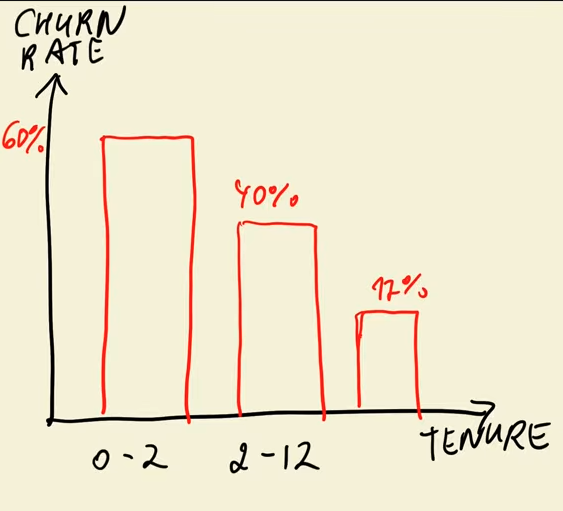

In [82]:
#Checking mean churn for different tenure durations
df_full_train.monthlycharges.min(), df_full_train.monthlycharges.mean(), df_full_train.monthlycharges.max()

(np.float64(18.25), np.float64(64.77912673056444), np.float64(118.65))

In [83]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

np.float64(0.08795411089866156)

In [84]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

np.float64(0.18340943683409436)

In [85]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

np.float64(0.32499341585462205)

Positive Correlation for monthly charges

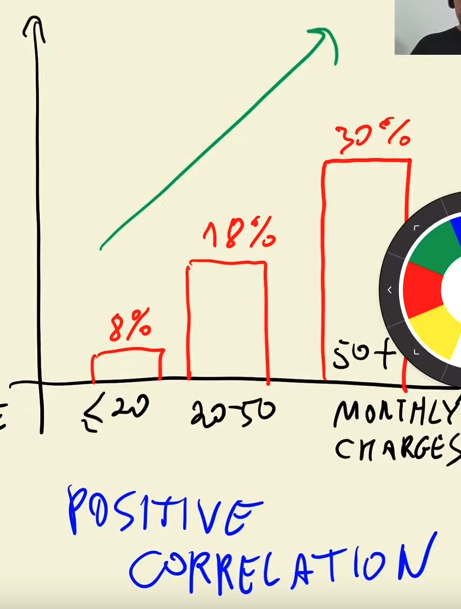

# 3.8 One-hot encoding
* Use scikit-Learn to encode categorical features

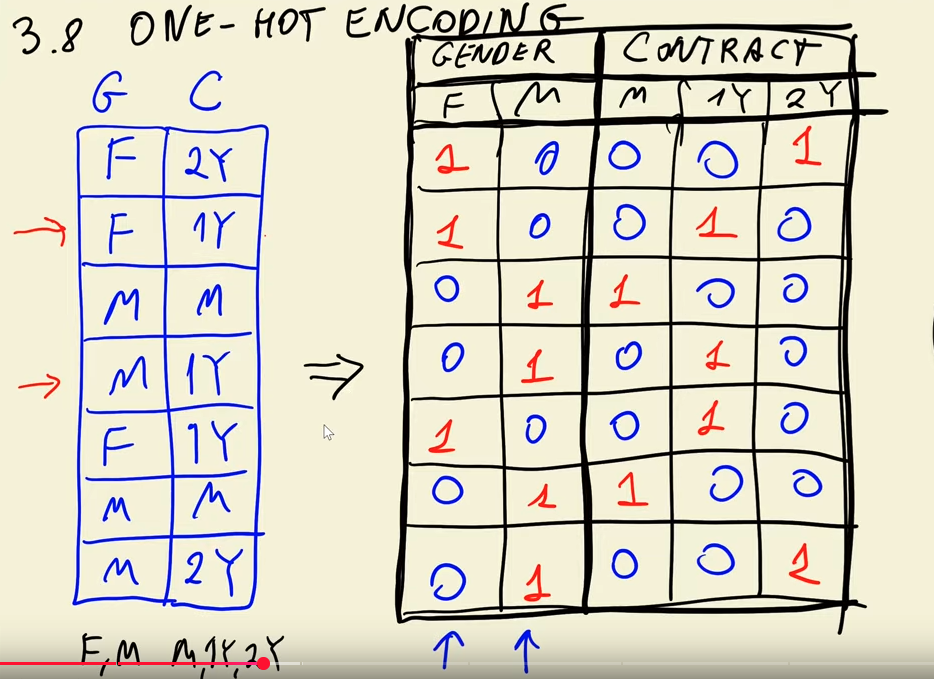

In [86]:
from sklearn.feature_extraction import DictVectorizer

In [87]:
df_train[['gender','contract']].iloc[:10]

gender        contract
0  female        two_year
1    male  month-to-month
2  female  month-to-month
3  female  month-to-month
4  female        two_year
5    male  month-to-month
6    male  month-to-month
7  female  month-to-month
8  female        two_year
9  female  month-to-month

In [88]:
dicts = df_train[['gender','contract']].iloc[:100].to_dict(orient='records')

In [89]:
dicts[:10]

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'}]

In [90]:
dv = DictVectorizer(sparse=False)

DictVectorizer is a class from sklearn.feature_extraction that converts lists of Python dictionaries into numeric feature vectors — kind of like one-hot encoding for dictionary data.

It’s designed for structured data (e.g. categorical features represented as dicts) rather than free text.

In short DictVectorizer converts lists of dictionaries (e.g. JSON-like feature records) into numeric arrays by one-hot encoding categorical features and passing through numeric ones — perfect for machine learning models in scikit-learn.


Sparse refers to how the data is stored in memory — not how it looks when you print it.

When sparse=True, the data is stored as a sparse matrix, which only stores the non-zero values — saving a huge amount of memory when most of your values are zero.

When sparse=False, the data is stored as a regular (dense) NumPy array — which explicitly stores every value, including zeros.

<details>
<summary>▶️ What do fit() and transform() do?</summary>

- `fit()` learns the feature mapping  
- `transform()` applies it to data  
- `fit_transform()` combines both  

</details>


In [91]:
dv.fit(dicts)

DictVectorizer(sparse=False)

In [92]:
Xtrain = dv.transform(dicts)

In [93]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male'], dtype=object)

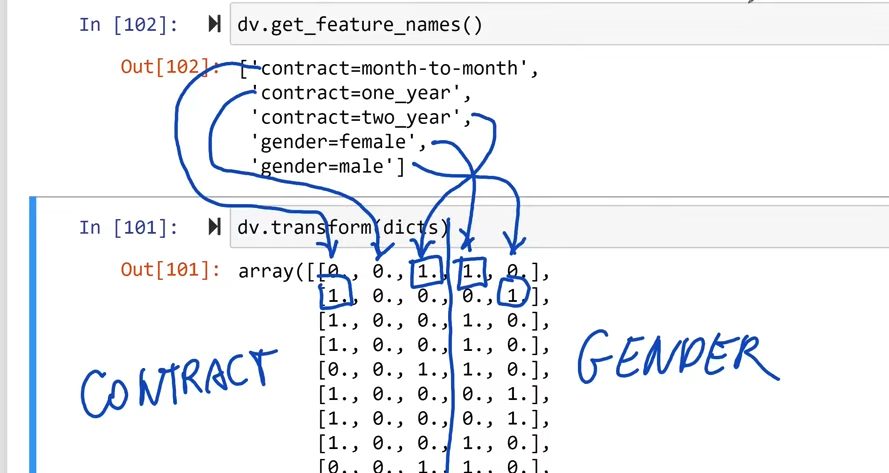

DictVectorizer is smart to distingiush between categorical and numerical variables, e.g if we add tenure as well it will not hot encode it rather it will add its value as is like :

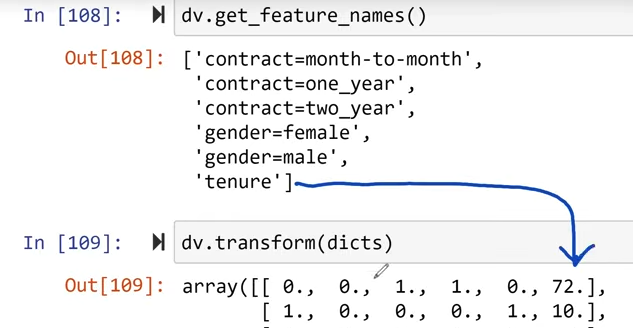

Adding both categorical and numerical variables

In [94]:
train_dicts = df_train[categorcial + numerical].to_dict(orient='records')

/tmp/ipykernel_4673/1094742719.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  train_dicts = df_train[categorcial + numerical].to_dict(orient='records')


In [95]:
dv = DictVectorizer(sparse=False)

In [96]:
X_train = dv.fit_transform(train_dicts)

In [97]:
X_train[:2]

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 1.15500e+02, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 9.52500e+01, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.0

Doing transformation for validation data set 

In [98]:
val_dicts = df_val[categorcial + numerical].to_dict(orient='records')

/tmp/ipykernel_4673/1266449130.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  val_dicts = df_val[categorcial + numerical].to_dict(orient='records')


In [99]:
X_val = dv.transform(val_dicts)

# 3.9 Logistic Regression
* Binary classification
* Linear vs logistic regression

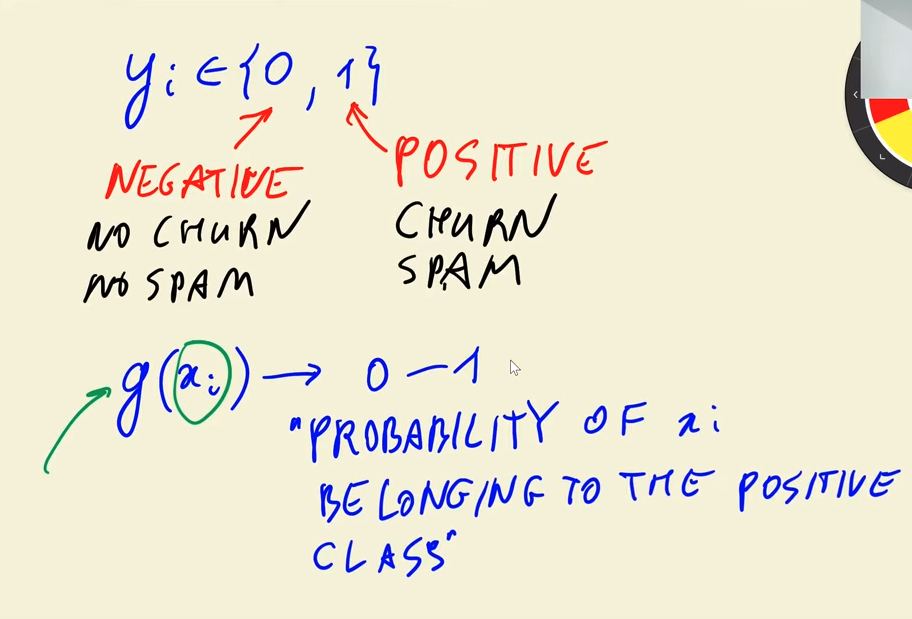

Linear regression formula:

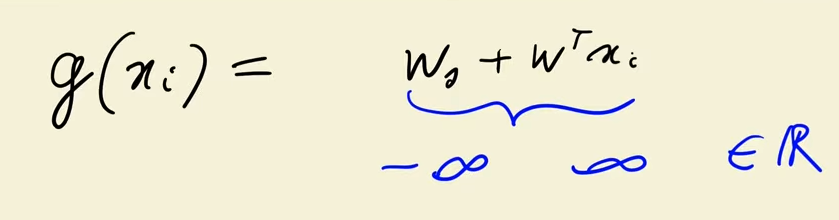

Logistic regression formula:
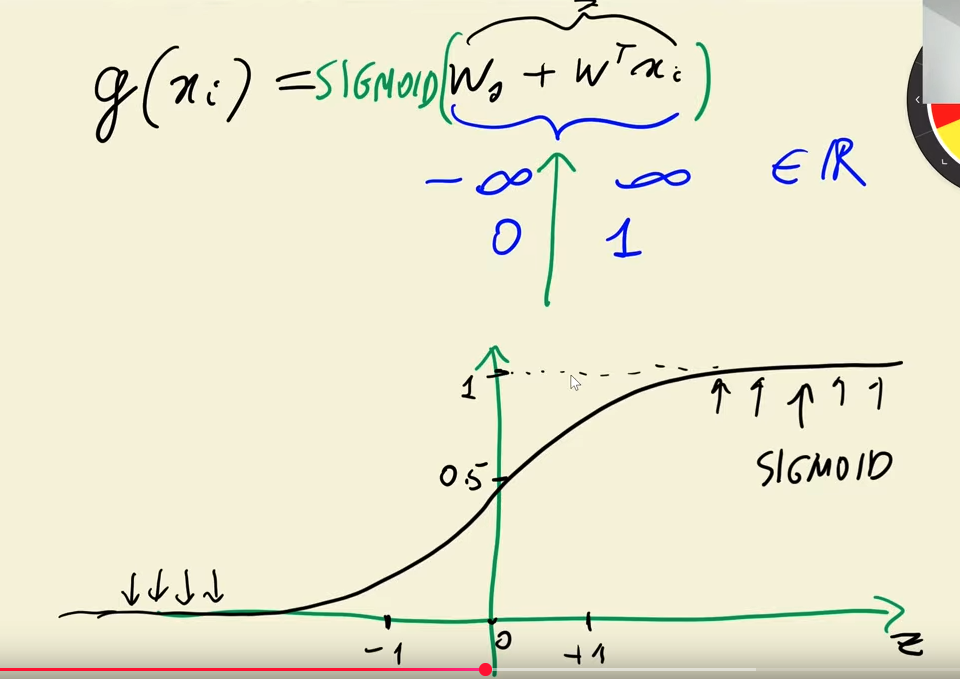


Lets implement a example of sigmoid

In [100]:
def sigmoid(z):
    return 1 / (1 +np.exp(-z))

In [101]:
z = np.linspace(-7, 7, 51)

In [102]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

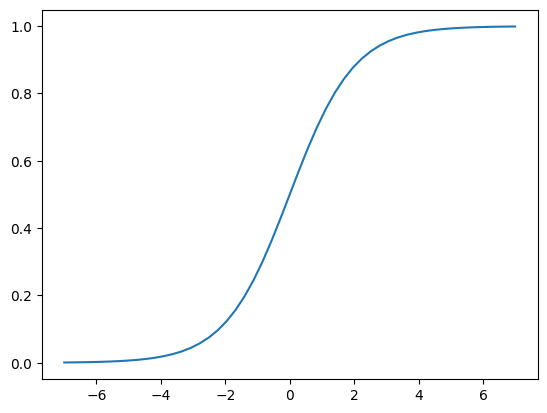

In [103]:
plt.plot(z, sigmoid(z))

In [104]:
def linear_regression(xi):
    result = w0

    for j in range(len(w)):
        result = result + xi[j] * w[j]

    return result

In [105]:
def logistic_regression(xi):
    score=w0

    for j in range(len(w)):
        score = score + xi[j] * w[j]

    result = sigmoid(score)
    return result

# 3.10 Training Logistic regression with Scikit-Learn
* Train a model with scikit-learn
* apply it to validation dataset
* calculate the accuracy

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
model = LogisticRegression()
model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [108]:
#Gettings the w`s
model.coef_[0].round(3)

array([ 0.564, -0.154, -0.519, -0.013, -0.095,  0.071, -0.098, -0.082,
       -0.033, -0.076, -0.354,  0.343, -0.098,  0.002, -0.251,  0.162,
       -0.02 ,  0.066, -0.098, -0.076,  0.251, -0.098, -0.261, -0.228,
        0.119, -0.121,  0.012, -0.095, -0.03 ,  0.045, -0.028,  0.162,
       -0.271,  0.221, -0.097, -0.098,  0.087, -0.05 , -0.098,  0.039,
        0.194, -0.098, -0.205, -0.072,  0.   ])

In [109]:
model.intercept_[0]

np.float64(-0.1109287445794238)

In [110]:
model.predict_proba(X_train)

array([[0.91088688, 0.08911312],
       [0.33128828, 0.66871172],
       [0.36229559, 0.63770441],
       ...,
       [0.48776317, 0.51223683],
       [0.96993479, 0.03006521],
       [0.2971009 , 0.7028991 ]], shape=(4225, 2))

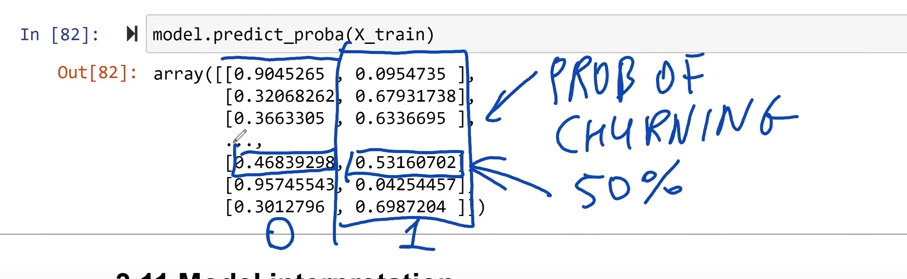


Since we are only interested in the churn prediction , we will only work with the 2nd column above

In [111]:
y_pred = model.predict_proba(X_val)[:, 1]

In [112]:
y_pred

array([0.00786347, 0.20992803, 0.2237105 , ..., 0.15014869, 0.77668113,
       0.81035774], shape=(1409,))

In [113]:
y_pred >= 0.5

array([False, False, False, ..., False,  True,  True], shape=(1409,))

In [114]:
#True are the ppl that are going to chrun

In [115]:
churn_decision = (y_pred >= 0.5)

In [116]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 322, dtype: object

In [117]:
#Above are the ppl are are likely to churn and should rx promotional offers

Now we will test how accurately the model sdid the predictions

In [118]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [119]:
(y_val == churn_decision).mean()

np.float64(0.801277501774308)

In [120]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [121]:
df_pred

probability  prediction  actual
0        0.007863           0       0
1        0.209928           0       0
2        0.223710           0       0
3        0.561123           1       1
4        0.219586           0       0
...           ...         ...     ...
1404     0.297790           0       0
1405     0.035463           0       1
1406     0.150149           0       0
1407     0.776681           1       1
1408     0.810358           1       1

[1409 rows x 3 columns]

In [122]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [123]:
df_pred

probability  prediction  actual  correct
0        0.007863           0       0     True
1        0.209928           0       0     True
2        0.223710           0       0     True
3        0.561123           1       1     True
4        0.219586           0       0     True
...           ...         ...     ...      ...
1404     0.297790           0       0     True
1405     0.035463           0       1    False
1406     0.150149           0       0     True
1407     0.776681           1       1     True
1408     0.810358           1       1     True

[1409 rows x 4 columns]

In [124]:
df_pred.correct.mean()

np.float64(0.801277501774308)

so the model is coorect 80% of the time

# 3.11 Model interpretation
* Loot at the cofficients
* Train a smaller model with fewer features

In [125]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [126]:
model.coef_[0].round(3)

array([ 0.564, -0.154, -0.519, -0.013, -0.095,  0.071, -0.098, -0.082,
       -0.033, -0.076, -0.354,  0.343, -0.098,  0.002, -0.251,  0.162,
       -0.02 ,  0.066, -0.098, -0.076,  0.251, -0.098, -0.261, -0.228,
        0.119, -0.121,  0.012, -0.095, -0.03 ,  0.045, -0.028,  0.162,
       -0.271,  0.221, -0.097, -0.098,  0.087, -0.05 , -0.098,  0.039,
        0.194, -0.098, -0.205, -0.072,  0.   ])

In [127]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.564),
 'contract=one_year': np.float64(-0.154),
 'contract=two_year': np.float64(-0.519),
 'dependents=no': np.float64(-0.013),
 'dependents=yes': np.float64(-0.095),
 'deviceprotection=no': np.float64(0.071),
 'deviceprotection=no_internet_service': np.float64(-0.098),
 'deviceprotection=yes': np.float64(-0.082),
 'gender=female': np.float64(-0.033),
 'gender=male': np.float64(-0.076),
 'internetservice=dsl': np.float64(-0.354),
 'internetservice=fiber_optic': np.float64(0.343),
 'internetservice=no': np.float64(-0.098),
 'monthlycharges': np.float64(0.002),
 'multiplelines=no': np.float64(-0.251),
 'multiplelines=no_phone_service': np.float64(0.162),
 'multiplelines=yes': np.float64(-0.02),
 'onlinebackup=no': np.float64(0.066),
 'onlinebackup=no_internet_service': np.float64(-0.098),
 'onlinebackup=yes': np.float64(-0.076),
 'onlinesecurity=no': np.float64(0.251),
 'onlinesecurity=no_internet_service': np.float64(-0.098),
 'onlinesecurity=yes

We will take subset of features to train a smaller model

In [128]:
small = ['contract', 'tenure', 'monthlycharges']

In [129]:
df_train[small]

contract  tenure  monthlycharges
0           two_year      72          115.50
1     month-to-month      10           95.25
2     month-to-month       5           75.55
3     month-to-month       5           80.85
4           two_year      18           20.10
...              ...     ...             ...
4220        one_year      52           80.85
4221  month-to-month      18           25.15
4222  month-to-month       2           90.00
4223        two_year      27           24.50
4224  month-to-month       9           80.85

[4225 rows x 3 columns]

In [130]:
#checking how it looks like as dictionary

df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [131]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [132]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [133]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [134]:
X_train_small = dv_small.transform(dicts_train_small)
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [135]:
w0 = model_small.intercept_[0]

In [136]:
w = model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [137]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

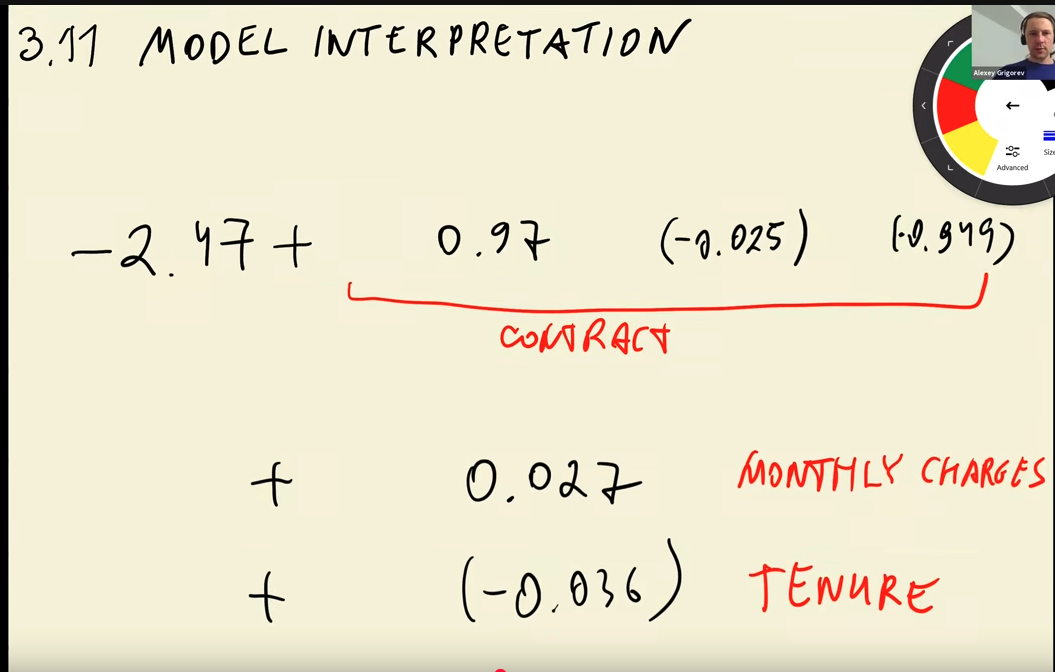

If a customer has 1 year contract, pays 50 per month and has 5 yrs contract :



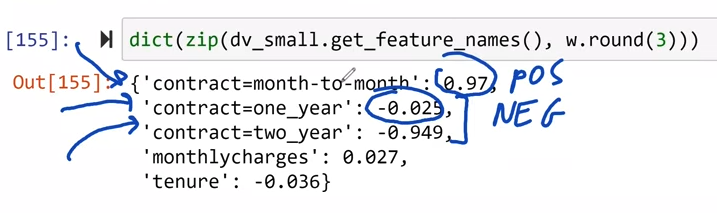

-ve values have less impact or no impact on churn rate, in above screen , month to monht contact can lead to high churn rate

In [138]:
sigmoid( -2.476 + 0.97 + 50 * 0.027 + 5 * (-0.036))

np.float64(0.4167814509159666)

# 3.12 Using the model

We will train the model with full features

In [139]:
df_full_train.head().T

0                        1  \
customerid                 5442-pptjy               6261-rcvns   
gender                           male                   female   
seniorcitizen                       0                        0   
partner                           yes                       no   
dependents                        yes                       no   
tenure                             12                       42   
phoneservice                      yes                      yes   
multiplelines                      no                       no   
internetservice                    no                      dsl   
onlinesecurity    no_internet_service                      yes   
onlinebackup      no_internet_service                      yes   
deviceprotection  no_internet_service                      yes   
techsupport       no_internet_service                      yes   
streamingtv       no_internet_service                       no   
streamingmovies   no_internet_service                      yes   
contract                     two_year                 one_year   
paperlessbilling                   no                       no   
paymentmethod            mailed_check  credit_card_(automatic)   
monthlycharges                   19.7                     73.9   
totalcharges                   258.35                  3160.55   
churn                               0                        1   

                                          2                 3  \
customerid                       2176-osjuv        6161-erdgd   
gender                                 male              male   
seniorcitizen                             0                 0   
partner                                 yes               yes   
dependents                               no               yes   
tenure                                   71                71   
phoneservice                            yes               yes   
multiplelines                           yes               yes   
internetservice                         dsl               dsl   
onlinesecurity                          yes               yes   
onlinebackup                            yes                no   
deviceprotection                         no               yes   
techsupport                             yes               yes   
streamingtv                              no               yes   
streamingmovies                          no               yes   
contract                           two_year          one_year   
paperlessbilling                         no                no   
paymentmethod     bank_transfer_(automatic)  electronic_check   
monthlycharges                        65.15             85.45   
totalcharges                        4681.75           6300.85   
churn                                     0                 0   

                                 4  
customerid              2364-ufrom  
gender                        male  
seniorcitizen                    0  
partner                         no  
dependents                      no  
tenure                          30  
phoneservice                   yes  
multiplelines                   no  
internetservice                dsl  
onlinesecurity                 yes  
onlinebackup                   yes  
deviceprotection                no  
techsupport                    yes  
streamingtv                    yes  
streamingmovies                 no  
contract                  one_year  
paperlessbilling                no  
paymentmethod     electronic_check  
monthlycharges                70.4  
totalcharges               2044.75  
churn                            0

In [140]:
#CONVERTING into dictionary to get the feature matrix so we can train the model with feature matrix

dicts_full_train = df_full_train[categorcial + numerical].to_dict(orient='records')

/tmp/ipykernel_4673/3358756116.py:3: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  dicts_full_train = df_full_train[categorcial + numerical].to_dict(orient='records')


In [141]:
dicts_full_train[:3]

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'tenure': 12,
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'tenure': 42,
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(autom

In [142]:
#Now we will create a DictVectorizer
dv = DictVectorizer(sparse=False)

In [143]:
X_full_train = dv.fit_transform(dicts_full_train)

In [144]:
y_full_train = df_full_train.churn.values

In [145]:
model = LogisticRegression().fit(X_full_train, y_full_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [146]:
dicts_test = df_test[categorcial + numerical].to_dict(orient='records')

/tmp/ipykernel_4673/2396320362.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  dicts_test = df_test[categorcial + numerical].to_dict(orient='records')


In [147]:
X_test = dv.transform(dicts_test)

In [148]:
y_pred = model.predict_proba(X_test)[:, 1]

In [149]:
churn_decision = (y_pred >= 0.5)

In [150]:
(churn_decision == y_test).mean()

np.float64(0.8140525195173882)

In [152]:
# Lets use the model to predict if customer will churn , lets take row 10 customer

customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'tenure': 32,
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [154]:
X_small = dv.transform([customer])

In [155]:
model.predict_proba(X_small)

array([[0.50207806, 0.49792194]])

In [156]:
# the churn probability is 0.49 and since our threshold is 50 % we can say customer is not going to churn

In [158]:
# From the test data set we can see the customer was not gonig to churn
y_test[10]

np.int64(0)